In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df=df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

In [8]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

#### Lets check the relation between Gender and Exited

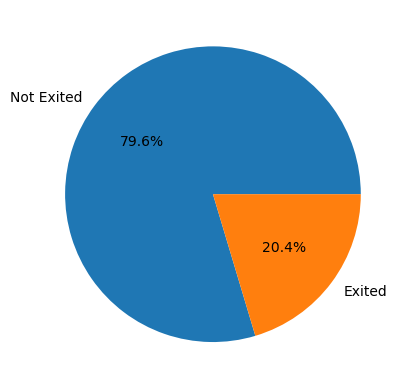

In [10]:
plt.pie(df['Exited'].value_counts(),labels=['Not Exited','Exited'],autopct="%.1f%%")
plt.show()

## Result from above pieplot: Dataset is highly imbalanced

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

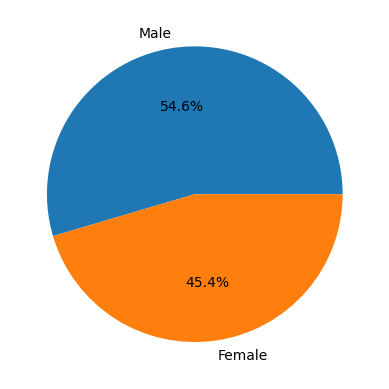

In [12]:
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct="%.1f%%")
plt.show()

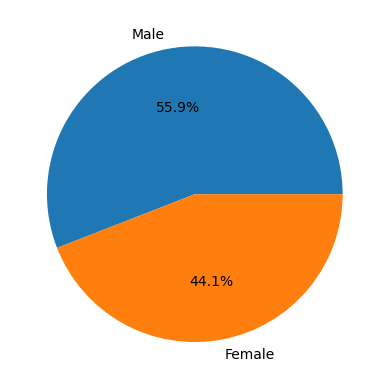

In [13]:
plt.pie(df[df['Exited']==1]['Gender'].value_counts(),labels=['Male','Female'],autopct="%.1f%%")
plt.show()

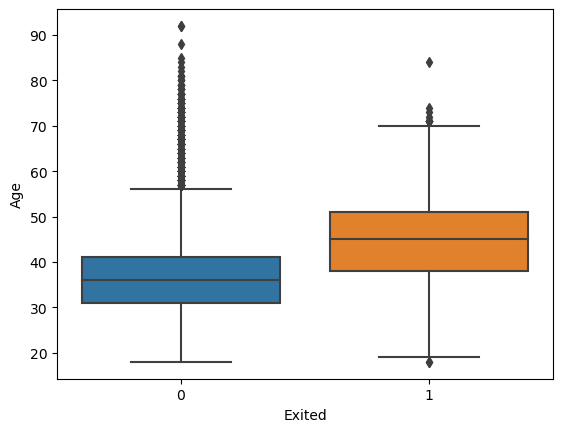

In [14]:
sns.boxplot(x='Exited',y='Age',data=df)
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

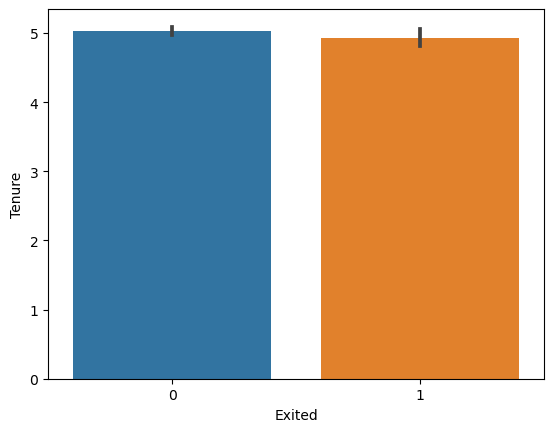

In [15]:
sns.barplot(x='Exited',y='Tenure',data=df)
plt.show()

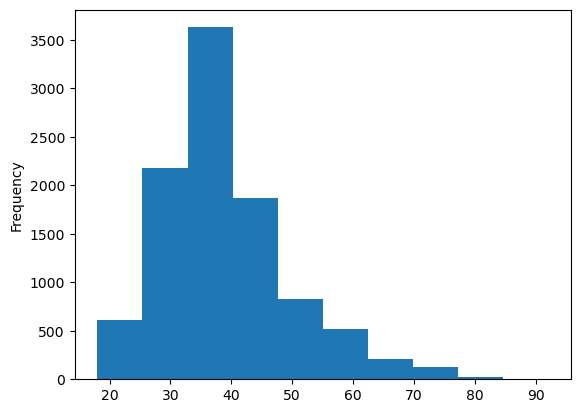

In [16]:
df['Age'].plot(kind='hist',bins=10)
plt.show()

/tmp/ipykernel_2229/191955657.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


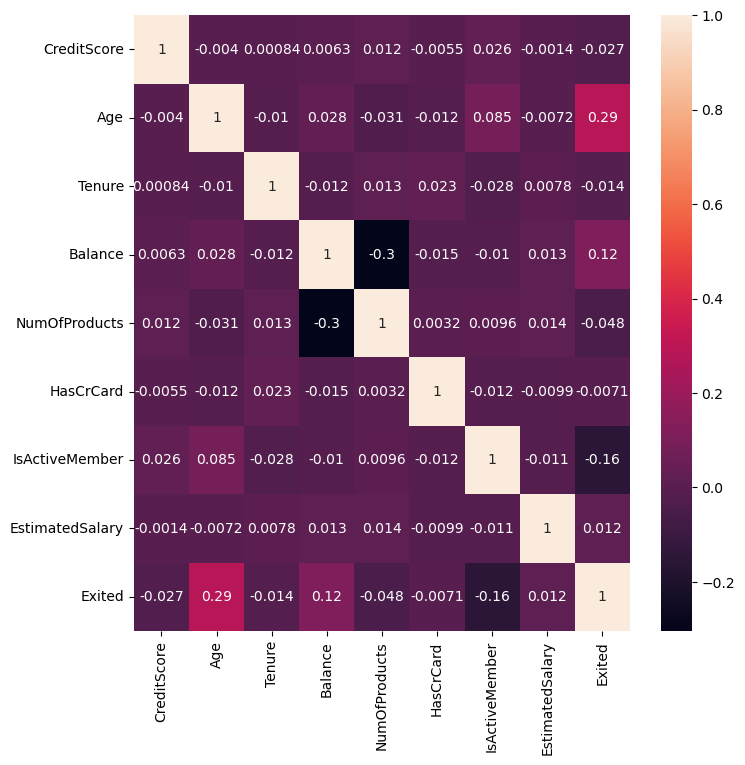

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Manipulation

#### Converting the categorical column to numerical

In [18]:
df['Gender'].replace({'Male': 0,'Female': 1},inplace=True)

In [19]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0


### Remember our dataset was imbalanced so lets balance it by using downsampling technique

In [20]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
from sklearn.utils import resample

In [22]:
# We will downsample 0 to match the length of 1
df_min=df[df['Exited']==1]
df_maj=df[df['Exited']==0]

In [23]:
df_maj_ds=resample(df_maj,n_samples=2037,replace=False)

In [24]:
df_new=pd.concat([df_min,df_maj_ds])

In [25]:
df_new.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1
7,376,1,29,4,115046.74,4,1,0,119346.88,1
16,653,0,58,1,132602.88,1,1,0,5097.67,1


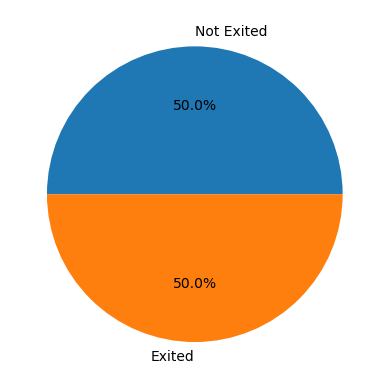

In [26]:
plt.pie(df_new['Exited'].value_counts(),labels=['Not Exited','Exited'],autopct="%.1f%%")
plt.show()

### Spliting the dataset

In [27]:
x=df_new.drop(['Exited'],axis=1)
y=df_new['Exited']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.9)

In [30]:
print(x_train.shape,x_test.shape)

(3666, 9) (408, 9)


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model Development and Evaluation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [36]:
algos={
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'XGB':xgb,
    'BC':bc,
    'ETC':etc
}

### Important metrics for evaluation

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [38]:
pre_acc = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc[name] = {
        'Precision': precision_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [39]:
pre_acc

{'SVC': {'Precision': 0.6476683937823834,
  'Accuracy': 0.571078431372549,
  'Confusion Matrix': array([[108,  68],
         [107, 125]])},
 'KNC': {'Precision': 0.7978723404255319,
  'Accuracy': 0.7058823529411765,
  'Confusion Matrix': array([[138,  38],
         [ 82, 150]])},
 'LR': {'Precision': 0.8028846153846154,
  'Accuracy': 0.7401960784313726,
  'Confusion Matrix': array([[135,  41],
         [ 65, 167]])},
 'DTC': {'Precision': 0.8465346534653465,
  'Accuracy': 0.7745098039215687,
  'Confusion Matrix': array([[145,  31],
         [ 61, 171]])},
 'RFC': {'Precision': 0.8260869565217391,
  'Accuracy': 0.7622549019607843,
  'Confusion Matrix': array([[140,  36],
         [ 61, 171]])},
 'ABC': {'Precision': 0.8599033816425121,
  'Accuracy': 0.7965686274509803,
  'Confusion Matrix': array([[147,  29],
         [ 54, 178]])},
 'XGB': {'Precision': 0.8300970873786407,
  'Accuracy': 0.7647058823529411,
  'Confusion Matrix': array([[141,  35],
         [ 61, 171]])},
 'BC': {'Precis

## We can see that the AdaBoost Classifier has performed well than others so we can go with it